In [92]:
import pandas as pd
import numpy as np
heart_disease_data=pd.read_csv(R"C:\Users\91771\Downloads\HeartDiseasePrediction\Heart Disease Prediction\Dataset\HeartDisease.csv")
heart_disease_data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
heart_disease_data.shape

(303, 14)

In [94]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [95]:
heart_disease_data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [96]:
# convert target variable income to categorical
heart_disease_data['target']=heart_disease_data['target'].astype('category')

# Model Building and Evaluation

In [97]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split as tts
X=heart_disease_data.drop('target',axis=1)
y=heart_disease_data['target']

X_train,X_test,y_train,y_test=tts(X,y,train_size=0.7,test_size=0.3,random_state=100)
X_train.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3


In [98]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier


# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default= DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [99]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Making predictions
y_pred_default=dt_default.predict(X_test)


# Printing classification report
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        46
           1       0.77      0.82      0.80        45

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [100]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[35 11]
 [ 8 37]]
0.7912087912087912


[Text(156.32205882352943, 199.32, 'X[12] <= 2.5\ngini = 0.491\nsamples = 212\nvalue = [92, 120]'),
 Text(78.7764705882353, 163.07999999999998, 'X[11] <= 0.5\ngini = 0.361\nsamples = 131\nvalue = [31, 100]'),
 Text(39.38823529411765, 126.83999999999999, 'X[9] <= 2.7\ngini = 0.187\nsamples = 86\nvalue = [9, 77]'),
 Text(19.694117647058825, 90.6, 'X[7] <= 83.5\ngini = 0.154\nsamples = 83\nvalue = [7, 76]'),
 Text(9.847058823529412, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(29.541176470588237, 54.359999999999985, 'X[4] <= 272.0\ngini = 0.136\nsamples = 82\nvalue = [6, 76]'),
 Text(19.694117647058825, 18.119999999999976, 'gini = 0.061\nsamples = 64\nvalue = [2, 62]'),
 Text(39.38823529411765, 18.119999999999976, 'gini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(59.082352941176474, 90.6, 'X[7] <= 147.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(49.23529411764706, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(68.92941176470589, 

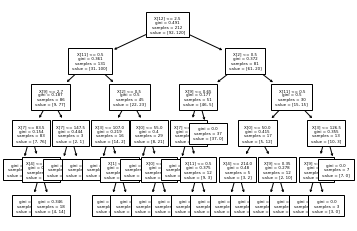

In [101]:
from sklearn import tree
tree.plot_tree(dt_default,fontsize=4)

In [102]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds=5

# parameters to build the model on
parameters={'max_depth':range(1,40)}


# instantiate the model
dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

# fit tree on training data
tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [103]:
# scores of GridSearch CV
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008924,0.007137,0.002604,0.002130,1,{'max_depth': 1},0.697674,0.767442,0.738095,0.785714,...,0.740642,0.032549,38,0.775148,0.757396,0.764706,0.752941,0.752941,0.760627,0.008439
1,0.001627,0.003255,0.002118,0.003119,2,{'max_depth': 2},0.697674,0.651163,0.738095,0.690476,...,0.712625,0.045787,39,0.775148,0.781065,0.764706,0.794118,0.782353,0.779478,0.009613
2,0.009364,0.007646,0.000000,0.000000,3,{'max_depth': 3},0.720930,0.813953,0.809524,0.690476,...,0.764120,0.049598,3,0.875740,0.852071,0.876471,0.847059,0.858824,0.862033,0.012084
3,0.004265,0.003559,0.002030,0.003159,4,{'max_depth': 4},0.744186,0.767442,0.761905,0.809524,...,0.773754,0.022258,1,0.911243,0.911243,0.900000,0.876471,0.894118,0.898615,0.012895
4,0.000000,0.000000,0.014652,0.002856,5,{'max_depth': 5},0.720930,0.813953,0.785714,0.738095,...,0.759358,0.034803,4,0.952663,0.946746,0.970588,0.923529,0.941176,0.946940,0.015319


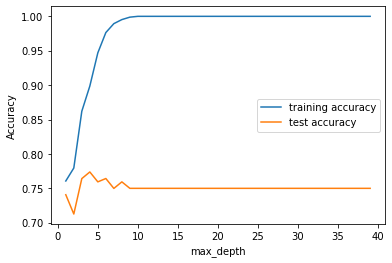

In [104]:
# plotting accuracies with max_depth
import matplotlib.pyplot as plt
plt.figure()
plt.plot(scores['param_max_depth'],
        scores['mean_train_score'],
        label='training accuracy')
plt.plot(scores['param_max_depth'],
        scores['mean_test_score'],
        label='test accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds=5

parameters={'min_samples_leaf':range(2,50,10)}

dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(2, 50, 10)},
             return_train_score=True, scoring='accuracy')

In [106]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006380,0.003290,0.002881,0.003356,2,{'min_samples_leaf': 2},0.720930,0.790698,0.690476,0.785714,...,0.730897,0.049879,5,0.940828,0.952663,0.952941,0.941176,0.935294,0.944581,0.007030
1,0.009049,0.007655,0.003136,0.006272,12,{'min_samples_leaf': 12},0.744186,0.813953,0.809524,0.761905,...,0.778295,0.028098,1,0.834320,0.840237,0.864706,0.835294,0.858824,0.846676,0.012620
2,0.003562,0.006126,0.007917,0.007039,22,{'min_samples_leaf': 22},0.697674,0.651163,0.738095,0.785714,...,0.731672,0.052000,4,0.775148,0.781065,0.764706,0.752941,0.782353,0.771243,0.011071
3,0.006302,0.003612,0.003716,0.003744,32,{'min_samples_leaf': 32},0.697674,0.697674,0.738095,0.785714,...,0.736213,0.034884,3,0.775148,0.769231,0.764706,0.752941,0.776471,0.767699,0.008503
4,0.007728,0.004687,0.002506,0.003561,42,{'min_samples_leaf': 42},0.697674,0.767442,0.738095,0.785714,...,0.740642,0.032549,2,0.775148,0.757396,0.764706,0.752941,0.752941,0.760627,0.008439


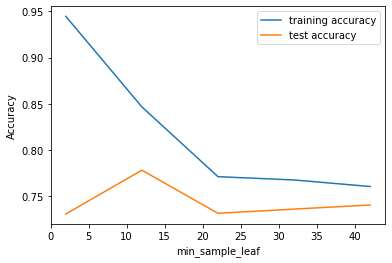

In [107]:
# plotting accuracies with min_samples_leaf
import matplotlib.pyplot as plt
plt.figure()
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_train_score'],
        label='training accuracy')
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_test_score'],
        label='test accuracy')
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds=5

parameters={'min_samples_split':range(5,30,5)}

dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [109]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006319,0.002289,0.001082,0.002163,5,{'min_samples_split': 5},0.674419,0.813953,0.761905,0.714286,...,0.745293,0.047436,4,0.970414,0.964497,0.982353,0.958824,0.964706,0.968159,0.007988
1,0.011188,0.006155,0.001643,0.003286,10,{'min_samples_split': 10},0.744186,0.767442,0.738095,0.761905,...,0.745183,0.018873,5,0.893491,0.928994,0.947059,0.917647,0.917647,0.920968,0.017448
2,0.004856,0.006341,0.008077,0.007006,15,{'min_samples_split': 15},0.744186,0.767442,0.809524,0.809524,...,0.778516,0.026458,3,0.887574,0.899408,0.882353,0.858824,0.905882,0.886808,0.016286
3,0.005475,0.007036,0.000000,0.000000,20,{'min_samples_split': 20},0.744186,0.813953,0.809524,0.809524,...,0.797342,0.026633,1,0.899408,0.857988,0.876471,0.858824,0.894118,0.877362,0.017243
4,0.008936,0.007343,0.000000,0.000000,25,{'min_samples_split': 25},0.720930,0.767442,0.809524,0.809524,...,0.788151,0.039756,2,0.857988,0.840237,0.876471,0.858824,0.864706,0.859645,0.011737


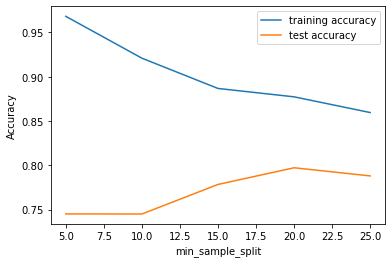

In [110]:
# plotting accuracies with min_samples_leaf
import matplotlib.pyplot as plt
plt.figure()
plt.plot(scores['param_min_samples_split'],
        scores['mean_train_score'],
        label='training accuracy')
plt.plot(scores['param_min_samples_split'],
        scores['mean_test_score'],
        label='test accuracy')
plt.xlabel("min_sample_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [111]:
### Creating the Final Model
param_grid={
    'max_depth':range(2,8,2),
    'min_samples_leaf':range(2,50,10),
    'min_samples_split':range(5,30,5),
    'criterion':["entropy",'gini']
}

nfolds=5

dtree=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=nfolds,verbose=1)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    7.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 8, 2),
                         'min_samples_leaf': range(2, 50, 10),
                         'min_samples_split': range(5, 30, 5)},
             verbose=1)

In [112]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005973,0.001378,0.002820,0.003165,entropy,2,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.697674,0.651163,0.738095,0.690476,0.785714,0.712625,0.045787,141
1,0.005483,0.004558,0.004809,0.006401,entropy,2,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.697674,0.651163,0.738095,0.690476,0.785714,0.712625,0.045787,141
2,0.003430,0.006106,0.006259,0.007666,entropy,2,2,15,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.697674,0.651163,0.738095,0.690476,0.785714,0.712625,0.045787,141
3,0.006249,0.007653,0.003124,0.006248,entropy,2,2,20,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.697674,0.651163,0.738095,0.690476,0.785714,0.712625,0.045787,141
4,0.005109,0.003299,0.005521,0.003652,entropy,2,2,25,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.697674,0.651163,0.738095,0.690476,0.785714,0.712625,0.045787,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.004081,0.003500,0.001622,0.003244,gini,6,42,5,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.697674,0.767442,0.738095,0.785714,0.714286,0.740642,0.032549,40
146,0.000840,0.001029,0.009400,0.001057,gini,6,42,10,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.697674,0.767442,0.738095,0.785714,0.714286,0.740642,0.032549,40
147,0.008360,0.000965,0.001990,0.001068,gini,6,42,15,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.697674,0.767442,0.738095,0.785714,0.714286,0.740642,0.032549,40
148,0.001416,0.002831,0.008553,0.003242,gini,6,42,20,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.697674,0.767442,0.738095,0.785714,0.714286,0.740642,0.032549,40


In [113]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy",grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8021040974529345
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=20)


In [114]:
# model with optimal hyperparameters
clf_gini=DecisionTreeClassifier(criterion="entropy",
                               random_state=100,
                               max_depth=4,
                               min_samples_leaf=12,
                               min_samples_split=5)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=12,
                       min_samples_split=5, random_state=100)

In [115]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8131868131868132

In [117]:
# Printing confusion matrix and accuracy
from sklearn.metrics import classification_report ,confusion_matrix
y_pred=clf_gini.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        46
           1       0.79      0.84      0.82        45

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [118]:
# Lets print result from previous analysis to see how much we have improved.
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[36 10]
 [ 7 38]]
0.8131868131868132


In [ ]:
# 2% increase in accuracy and 2 classifications more correctly predicted

In [119]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)